<a href="https://colab.research.google.com/github/Mz22222/PythonSeminars/blob/master/Sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas
import seaborn


In [5]:
df = pandas.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


задание_1

Изобразите отношение households к population с помощью точечного графика

<Axes: xlabel='households', ylabel='population'>

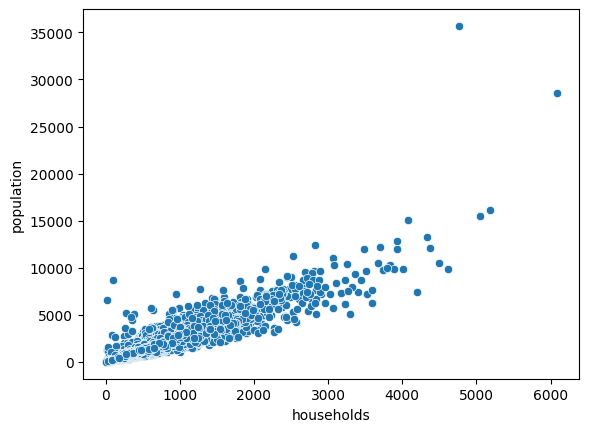

In [13]:
seaborn.scatterplot(data = df, x = 'households', y = 'population')

Задание_2

Визуализировать longitude по отношения к median_house_value, используя линейный график

<Axes: xlabel='longitude', ylabel='median_house_value'>

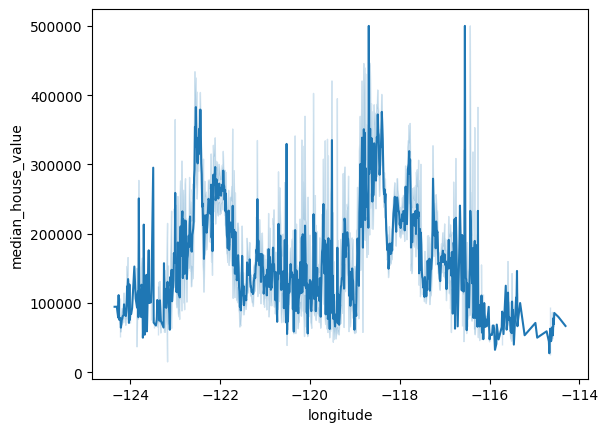

In [15]:
seaborn.lineplot(data = df, x = 'longitude', y = 'median_house_value')

Задание_3

Представить гистограмму по housing_median_age

<Axes: xlabel='housing_median_age', ylabel='Count'>

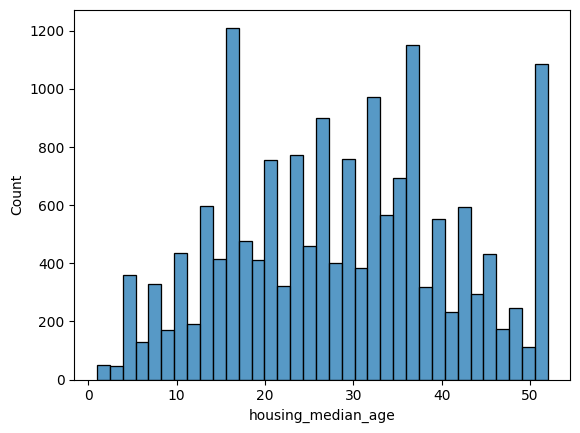

In [16]:
seaborn.histplot(data = df, x = 'housing_median_age')

Задание_4

Изобразить гистограмму по median_house_value с оттенком housing_median_age

<Axes: xlabel='median_house_value', ylabel='Count'>

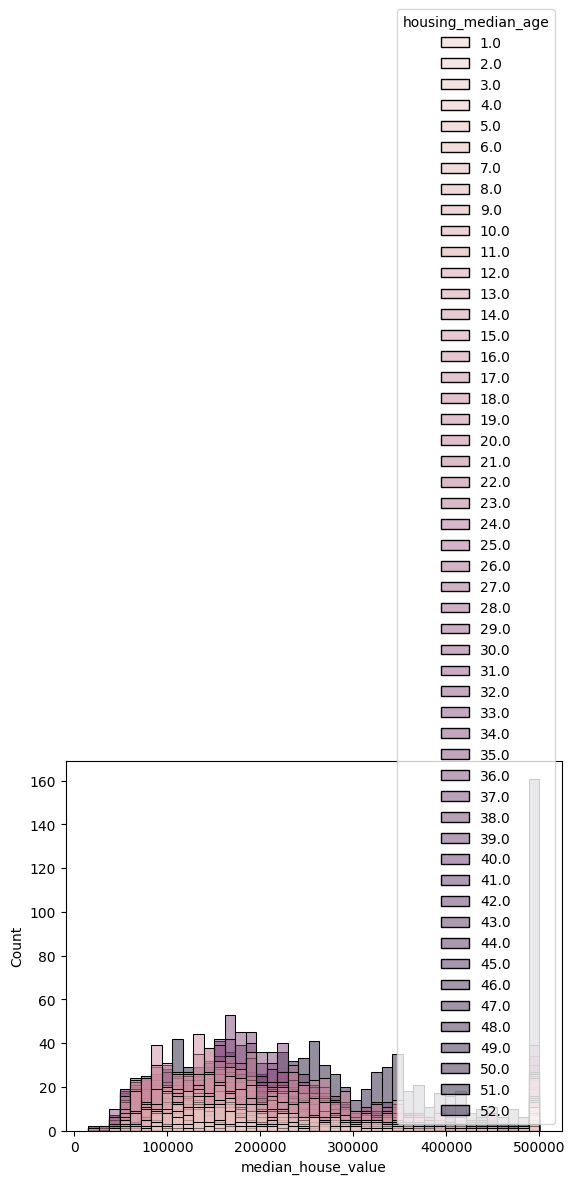

In [17]:
seaborn.histplot(data = df, x = 'median_house_value', hue = 'housing_median_age')

Написать *EDA* для датасета про пингвинов

Необходимо:

- Использовать 2-3 точечных графика
- Применить доп измерение в точечных графиках, используя аргументы *hue, size, stile*
- Использовать *PairGrid* с типом графика на ваш выбор
- Использовать 2-3 гистограммы

In [18]:
peng = seaborn.load_dataset('penguins')

In [21]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

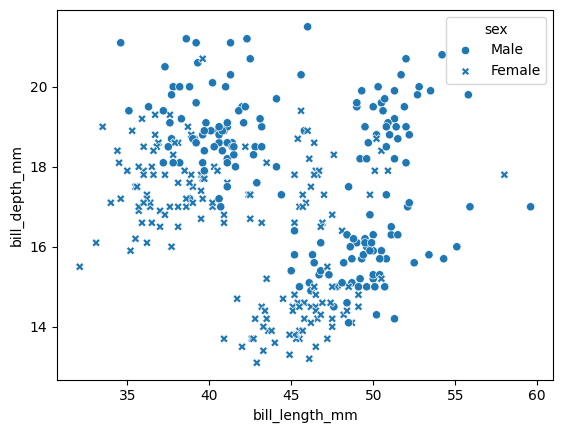

In [25]:
seaborn.scatterplot(data = peng, x = 'bill_length_mm', y = 'bill_depth_mm', style = 'sex')

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

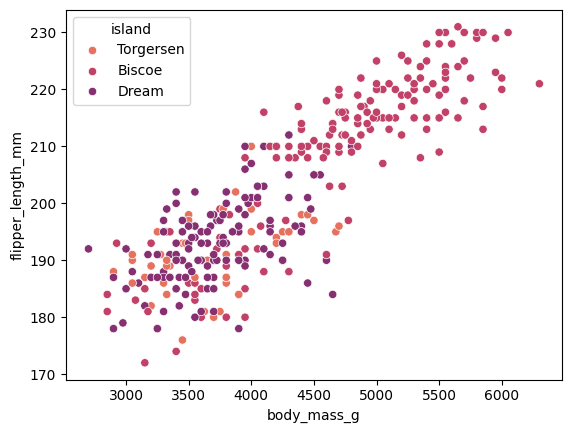

In [29]:
seaborn.scatterplot(data = peng, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'island', palette = 'flare')

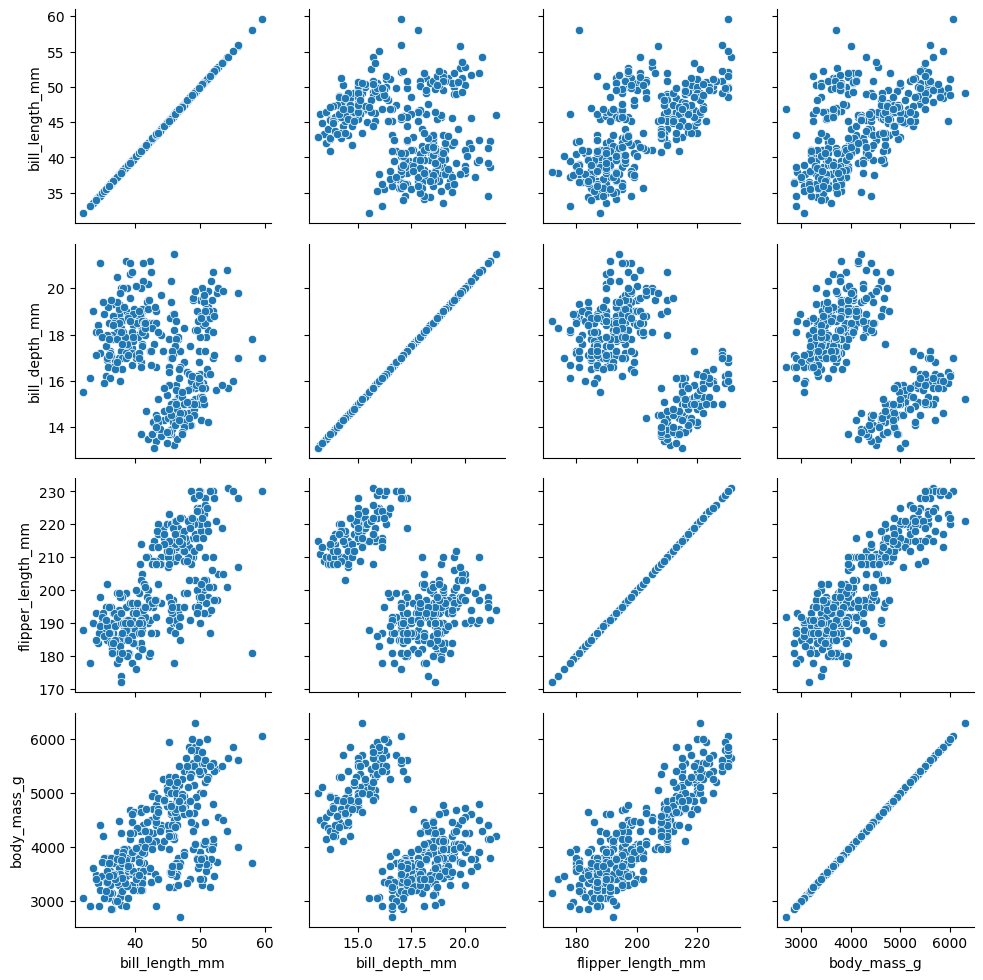

In [32]:
seaborn.PairGrid(peng).map(seaborn.scatterplot)

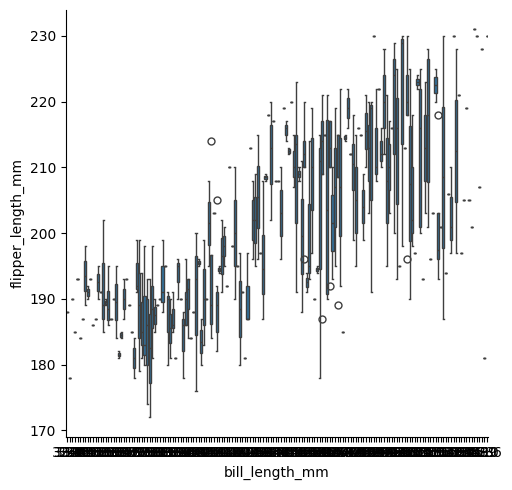

In [35]:
seaborn.catplot(data = peng, x = 'bill_length_mm', y = 'flipper_length_mm', kind = 'box' )

Создать новый столбец в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина. high - высокий(от 42), middle - средний(от 35 до 42), low - низкий(до 35).

In [40]:
def beak_category (bill_length_mm: float | None) -> str | None:
  if bill_length_mm > 42:
    return 'high'
  elif bill_length_mm > 35:
    return 'middle'
  elif bill_length_mm > 0:
    return 'junior'
  else:
    return bill_length_mm


peng['beak'] = [beak_category(i) for i in peng['bill_length_mm']]


In [41]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,beak
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle


<Axes: xlabel='bill_length_mm', ylabel='Count'>

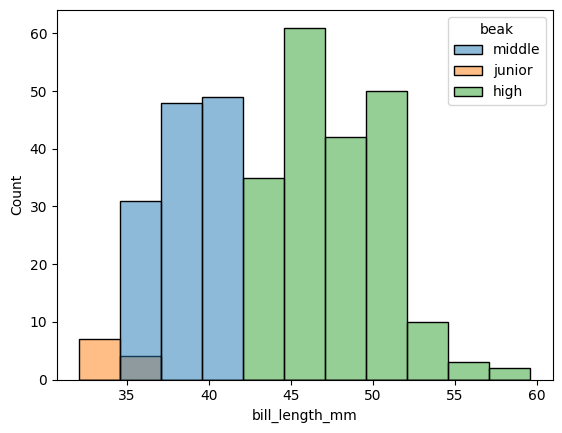

In [42]:
seaborn.histplot(data = peng, x = 'bill_length_mm', hue = 'beak')